In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"
key = "lambda"
quantile = "1"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

11it [00:00, 107.53it/s]

25it [00:00, 114.94it/s]

41it [00:00, 124.96it/s]

57it [00:00, 132.34it/s]

69it [00:00, 114.33it/s]

80it [00:00, 104.89it/s]

90it [00:00, 95.12it/s] 

104it [00:00, 104.44it/s]

120it [00:01, 115.62it/s]

136it [00:01, 124.88it/s]

152it [00:01, 132.00it/s]

168it [00:01, 137.88it/s]

184it [00:01, 142.68it/s]

200it [00:01, 145.79it/s]

216it [00:01, 148.18it/s]

232it [00:01, 150.61it/s]

248it [00:01, 150.75it/s]

265it [00:01, 153.37it/s]

282it [00:02, 155.61it/s]

298it [00:02, 156.29it/s]

315it [00:02, 157.53it/s]

331it [00:02, 157.51it/s]

347it [00:02, 156.40it/s]

363it [00:02, 156.45it/s]

379it [00:02, 156.44it/s]

395it [00:02, 155.73it/s]

411it [00:02, 155.63it/s]

428it [00:02, 157.48it/s]

444it [00:03, 149.81it/s]

461it [00:03, 152.48it/s]

478it [00:03, 155.40it/s]

494it [00:03, 155.94it/s]

510it [00:03, 156.40it/s]

526it [00:03, 156.41it/s]

542it [00:03, 155.66it/s]

558it [00:03, 123.47it/s]

573it [00:04, 129.09it/s]

589it [00:04, 134.12it/s]

605it [00:04, 139.57it/s]

621it [00:04, 144.20it/s]

638it [00:04, 149.66it/s]

654it [00:04, 150.53it/s]

670it [00:04, 151.78it/s]

686it [00:04, 131.19it/s]

701it [00:04, 136.28it/s]

717it [00:05, 140.36it/s]

733it [00:05, 144.02it/s]

748it [00:05, 124.73it/s]

764it [00:05, 132.22it/s]

780it [00:05, 138.17it/s]

796it [00:05, 143.27it/s]

812it [00:05, 146.14it/s]

827it [00:05, 146.60it/s]

843it [00:05, 148.29it/s]

859it [00:05, 150.17it/s]

875it [00:06, 150.31it/s]

891it [00:06, 137.96it/s]

907it [00:06, 141.94it/s]

923it [00:06, 145.70it/s]

939it [00:06, 149.33it/s]

955it [00:06, 150.14it/s]

971it [00:06, 150.34it/s]

987it [00:06, 147.80it/s]

1003it [00:06, 150.39it/s]

1019it [00:07, 128.95it/s]

1035it [00:07, 135.51it/s]

1050it [00:07, 139.31it/s]

1066it [00:07, 142.91it/s]

1081it [00:07, 142.36it/s]

1098it [00:07, 148.14it/s]

1114it [00:07, 146.60it/s]

1130it [00:07, 149.83it/s]

1146it [00:07, 151.56it/s]

1162it [00:08, 151.85it/s]

1178it [00:08, 149.39it/s]

1195it [00:08, 152.60it/s]

1211it [00:08, 153.01it/s]

1227it [00:08, 150.53it/s]

1243it [00:08, 151.03it/s]

1259it [00:08, 129.93it/s]

1274it [00:08, 133.55it/s]

1289it [00:08, 135.71it/s]

1304it [00:09, 137.76it/s]

1320it [00:09, 143.61it/s]

1337it [00:09, 148.02it/s]

1352it [00:09, 146.44it/s]

1367it [00:09, 142.62it/s]

1382it [00:09, 128.41it/s]

1396it [00:09, 117.21it/s]

1409it [00:09, 115.93it/s]

1421it [00:10, 105.28it/s]

1436it [00:10, 115.05it/s]

1453it [00:10, 125.81it/s]

1467it [00:10, 116.52it/s]

1480it [00:10, 107.56it/s]

1492it [00:10, 106.25it/s]

1504it [00:10, 103.43it/s]

1515it [00:10, 102.68it/s]

1526it [00:11, 101.50it/s]

1537it [00:11, 101.41it/s]

1548it [00:11, 102.63it/s]

1559it [00:11, 103.41it/s]

1573it [00:11, 111.80it/s]

1574it [00:11, 137.52it/s]


0it [00:00, ?it/s]

16it [00:00, 155.86it/s]

Number of empty sat catalogs is 68


32it [00:00, 154.28it/s]

48it [00:00, 154.01it/s]

64it [00:00, 154.97it/s]

81it [00:00, 156.64it/s]

98it [00:00, 159.52it/s]

115it [00:00, 160.97it/s]

132it [00:00, 161.18it/s]

149it [00:00, 161.61it/s]

165it [00:01, 159.74it/s]

182it [00:01, 161.51it/s]

199it [00:01, 162.36it/s]

216it [00:01, 163.47it/s]

233it [00:01, 159.46it/s]

249it [00:01, 141.93it/s]

264it [00:01, 133.83it/s]

278it [00:01, 117.51it/s]

291it [00:01, 118.80it/s]

308it [00:02, 128.83it/s]

325it [00:02, 137.23it/s]

340it [00:02, 122.97it/s]

356it [00:02, 131.72it/s]

370it [00:02, 116.46it/s]

383it [00:02, 118.67it/s]

399it [00:02, 128.49it/s]

415it [00:02, 135.33it/s]

431it [00:03, 141.71it/s]

447it [00:03, 146.41it/s]

464it [00:03, 150.67it/s]

481it [00:03, 154.66it/s]

498it [00:03, 156.84it/s]

514it [00:03, 157.03it/s]

530it [00:03, 156.91it/s]

546it [00:03, 157.79it/s]

562it [00:03, 157.23it/s]

579it [00:03, 158.19it/s]

595it [00:04, 158.44it/s]

612it [00:04, 159.11it/s]

629it [00:04, 159.85it/s]

646it [00:04, 160.87it/s]

663it [00:04, 145.80it/s]

678it [00:04, 129.87it/s]

692it [00:04, 119.96it/s]

705it [00:04, 115.22it/s]

717it [00:05, 111.68it/s]

729it [00:05, 109.41it/s]

741it [00:05, 107.11it/s]

753it [00:05, 108.83it/s]

769it [00:05, 120.32it/s]

785it [00:05, 128.84it/s]

801it [00:05, 135.19it/s]

817it [00:05, 141.67it/s]

834it [00:05, 146.78it/s]

849it [00:05, 142.91it/s]

865it [00:06, 147.15it/s]

881it [00:06, 150.44it/s]

898it [00:06, 153.34it/s]

914it [00:06, 154.23it/s]

931it [00:06, 157.80it/s]

948it [00:06, 159.35it/s]

964it [00:06, 134.55it/s]

981it [00:06, 141.61it/s]

997it [00:06, 146.60it/s]

1014it [00:07, 150.44it/s]

1031it [00:07, 150.71it/s]

1048it [00:07, 154.89it/s]

1064it [00:07, 155.09it/s]

1080it [00:07, 154.78it/s]

1096it [00:07, 129.16it/s]

1110it [00:07, 124.39it/s]

1126it [00:07, 133.06it/s]

1143it [00:07, 140.93it/s]

1159it [00:08, 145.95it/s]

1175it [00:08, 148.22it/s]

1192it [00:08, 152.17it/s]

1209it [00:08, 155.16it/s]

1225it [00:08, 135.29it/s]

1240it [00:08, 137.72it/s]

1255it [00:08, 135.72it/s]

1269it [00:08, 123.26it/s]

1286it [00:09, 133.34it/s]

1301it [00:09, 136.73it/s]

1316it [00:09, 125.34it/s]

1330it [00:09, 127.55it/s]

1348it [00:09, 138.62it/s]

1363it [00:09, 141.06it/s]

1381it [00:09, 149.81it/s]

1397it [00:09, 147.34it/s]

1413it [00:09, 150.88it/s]

1429it [00:09, 153.40it/s]

1447it [00:10, 159.73it/s]

1464it [00:10, 160.37it/s]

1481it [00:10, 138.76it/s]

1496it [00:10, 139.55it/s]

1513it [00:10, 145.34it/s]

1530it [00:10, 150.36it/s]

1547it [00:10, 154.97it/s]

1565it [00:10, 161.23it/s]

1574it [00:10, 143.91it/s]

Number of empty sat catalogs is 68


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:
/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

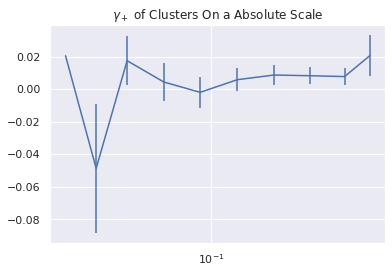

Aggregated xi:
[ -0.0205   3.2097  -4.3675  -1.7677   1.348   -7.2709 -15.515  -19.2438
 -16.7969  -7.0519]
------------------------------------------------------------------------------
Aggregated meanlogr:
[   -4.1936  -250.5687  -848.884  -1179.1005 -1703.8713 -2461.7597
 -2666.7189 -2383.2857 -1249.1719   -84.2468]
------------------------------------------------------------------------------
Aggregated npairs:
[1.000e+00 6.600e+01 2.500e+02 4.040e+02 6.960e+02 1.252e+03 1.788e+03
 2.334e+03 2.173e+03 3.420e+02]
------------------------------------------------------------------------------
Mean xi:
[-0.0205  0.0486 -0.0175 -0.0044  0.0019 -0.0058 -0.0087 -0.0082 -0.0077
 -0.0206]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.1936 -3.7965 -3.3955 -2.9186 -2.4481 -1.9663 -1.4915 -1.0211 -0.5749
 -0.2463]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

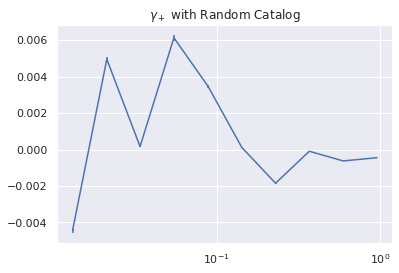

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1205e-04 -1.2496e-04 -4.1883e-06 -1.5463e-04 -8.7329e-05 -3.0561e-06
  4.6533e-05  2.3154e-06  1.5714e-05  1.1283e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

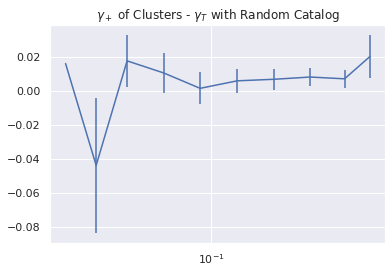

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

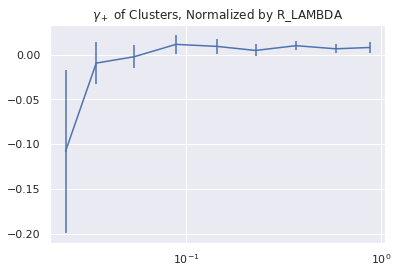

Aggregated xi:
[  0.       0.7558   1.3949   0.6847  -6.2498  -8.3475  -7.2007 -20.8802
 -16.5464 -11.0872]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -26.1042  -501.5841  -926.7834 -1303.6864 -1729.828
 -2217.0157 -2068.0325 -1325.4146  -175.8488]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.    7.  149.  318.  538.  891. 1496. 2060. 2483. 1364.]
------------------------------------------------------------------------------
Mean xi:
[    nan  0.108   0.0094  0.0022 -0.0116 -0.0094 -0.0048 -0.0101 -0.0067
 -0.0081]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7292 -3.3663 -2.9144 -2.4232 -1.9414 -1.482  -1.0039 -0.5338
 -0.1289]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)